In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_data_path = "dataset/train"

In [3]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 

In [4]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), 
                                      batch_size=128,
                                      class_mode='binary')

Found 11 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'salman-khan': 0, 'shahid-kapoor': 1}

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

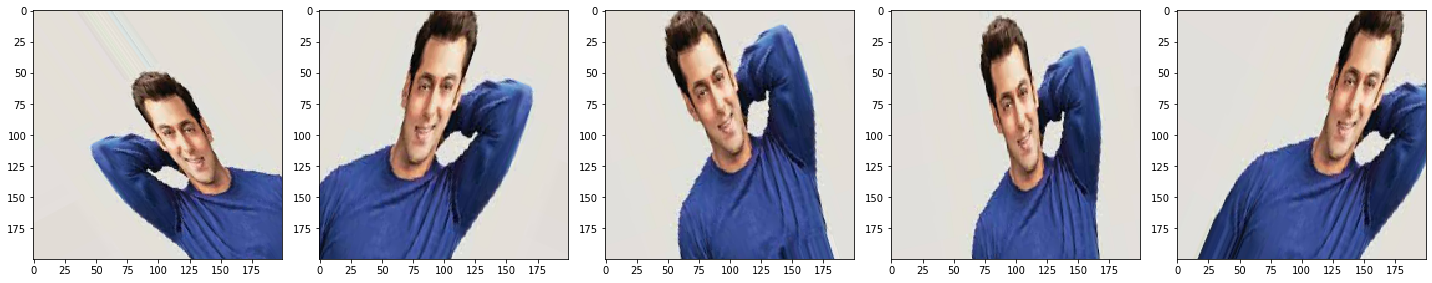

In [8]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 

In [11]:
cnn_model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1)

Epoch 1/50
1/1 [==============================] - 18s 18s/step - loss: 0.6462 - accuracy: 0.7273
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 0.7169 - accuracy: 0.5455
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 0.6770 - accuracy: 0.5455
Epoch 4/50
1/1 [==============================] - 6s 6s/step - loss: 0.7416 - accuracy: 0.6364
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 0.6547 - accuracy: 0.7273
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 0.6501 - accuracy: 0.5455
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 0.7569 - accuracy: 0.4545
Epoch 8/50
1/1 [==============================] - 7s 7s/step - loss: 0.7804 - accuracy: 0.3636
Epoch 9/50
1/1 [==============================] - 8s 8s/step - loss: 0.6454 - accuracy: 0.7273
Epoch 10/50
1/1 [==============================] - 10s 10s/step - loss: 0.5913 - accuracy: 0.7273
Epoch 11/50
1/1 [============================

In [17]:
test_data_path = "dataset/test"

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
test_set = test_datagen.flow_from_directory(test_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')
 

Found 2 images belonging to 2 classes.


In [25]:
cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= test_set)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.2818 - accuracy: 0.9091 - val_loss: 0.1146 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 0.7945 - accuracy: 0.8182 - val_loss: 0.2143 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 0.4335 - accuracy: 0.6364 - val_loss: 0.3788 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 0.5012 - accuracy: 0.8182 - val_loss: 0.4131 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 7s 7s/step - loss: 0.3980 - accuracy: 0.8182 - val_loss: 0.3996 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 0.3092 - accuracy: 0.8182 - val_loss: 0.3853 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 0.3298 - accuracy: 0.8182 - val_loss: 0.2551 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=========================

In [26]:
cnn_model.save("model_last.h5")